<span style="font-size: 36px;color: teal; font-family: TimesNewRoman;">Importing necessary libraries and the dataset<span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from scipy.stats import norm
from sklearn import metrics
from sklearn.metrics import classification_report
digits = load_digits()

In [2]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [3]:
digits.target.shape

(1797,)

In [4]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [5]:
digits.target_names.shape

(10,)

In [6]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
digits.data.shape

(1797, 64)

In [8]:
digits.images.shape

(1797, 8, 8)

<span style="font-size: 60px;color: teal; font-family: TimesNewRoman;">Gaussian Naive Bayes for Classification<span>

In [26]:
# Converting the dataframe into the respective numpy arrays
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()

<span> <li><span style="font-size: 20px;color:teal; font-family: TimesNewRoman;">Calculating the prior probability P(C)<li><span style="font-size: 20px;color:teal; font-family: TimesNewRoman;">Calculating the class means and variances <li><span style="font-size: 20px;color:teal; font-family: TimesNewRoman;">Handling zero variances as smoothing to reduce inconsistancies<span><li><span style="font-size: 20px;color:teal; font-family: TimesNewRoman;">Calculating and predicting the posterior probability<span>

In [27]:
# Calculate class priors
class_priors = np.bincount(y_train) / len(y_train)

# Calculate class means and variances
class_means = np.array([np.mean(X_train[y_train == c], axis=0) for c in range(10)])
class_variances = np.array([np.var(X_train[y_train == c], axis=0) for c in range(10)])

# Handle zero variances
class_variances[class_variances == 0] = 1e-9  # Set small non-zero value for zero variances

# Calculate log likelihoods
log_likelihoods = np.array([norm.logpdf(X_test, loc=class_means[c], scale=np.sqrt(class_variances[c])) for c in range(10)])

# Calculate log posterior probabilities
log_posterior_probs = log_likelihoods.sum(axis=2).T + np.log(class_priors)

# Make predictions
predictions = np.argmax(log_posterior_probs, axis=1)

<span style="font-size: 28px;color:teal; font-family: TimesNewRoman;">Confusion Matrix and Classification Report for 50% of training data and 50% of testing data<span>

Confusion matrix:
[[84  0  0  0  0  2  0  0  1  1]
 [ 0 65  2  0  0  0  0  5 13  6]
 [ 0  8 70  0  0  1  2  0  5  0]
 [ 0  2  2 71  0  2  0  2 10  2]
 [ 3  0  0  0 58  0  1 28  1  1]
 [ 0  2  0  4  0 72  1  5  2  5]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  2  0  0 13  0 72  2  0]
 [ 0  2  5  0  0  8  0  5 67  1]
 [ 1  1  0 10  0  4  1  6 13 56]]


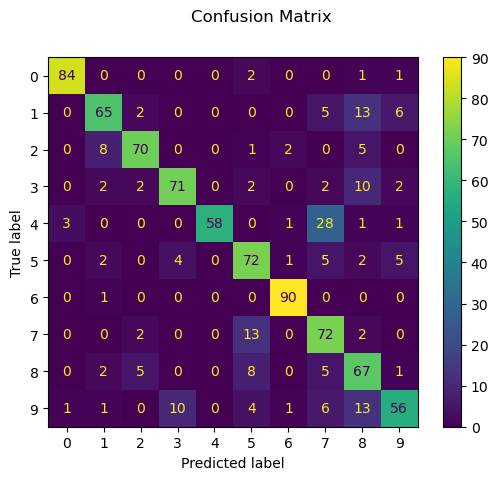

In [28]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predictions)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [29]:
from sklearn.metrics import classification_report
report = classification_report(y_test,predictions)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        88
           1       0.80      0.71      0.76        91
           2       0.86      0.81      0.84        86
           3       0.84      0.78      0.81        91
           4       1.00      0.63      0.77        92
           5       0.71      0.79      0.75        91
           6       0.95      0.99      0.97        91
           7       0.59      0.81      0.68        89
           8       0.59      0.76      0.66        88
           9       0.78      0.61      0.68        92

    accuracy                           0.78       899
   macro avg       0.81      0.79      0.79       899
weighted avg       0.81      0.78      0.79       899

